In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def printGraphState(g):
    """
    Prints out the number of nodes, edges, and selfloops in the given graph (g)
    """
    print("# nodes: " + str(g.number_of_nodes()))
    print(g.nodes())
    print("# edges: " + str(g.number_of_edges()))
    print(g.edges())

In [3]:
sd_nodes = pd.read_csv("./symptom-disease-nodes_simple-case.csv")
sd_nodes

,term,type
0,Blindness,symptom
1,Diabetes Mellitus,disease
2,Obesity,symptom
3,Myocardial Infarction,disease
4,Uveitis,disease


In [4]:
sd_edges = pd.read_csv("./symptom-disease-edges_simple-case.csv")
sd_edges

,symptom,disease
0,Blindness,Diabetes Mellitus
1,Obesity,Diabetes Mellitus
2,Obesity,Myocardial Infarction
3,Blindness,Uveitis


In [5]:
symptom_disease_graph = nx.from_pandas_edgelist(sd_edges, 'symptom', 'disease')
printGraphState(symptom_disease_graph)

# nodes: 5
['Blindness', 'Diabetes Mellitus', 'Obesity', 'Myocardial Infarction', 'Uveitis']
# edges: 4
[('Blindness', 'Diabetes Mellitus'), ('Blindness', 'Uveitis'), ('Diabetes Mellitus', 'Obesity'), ('Obesity', 'Myocardial Infarction')]


In [15]:
attr = pd.Series(data=sd_nodes.type, index=sd_nodes.index).to_dict()
index = 0
for i in symptom_disease_graph.nodes:
    symptom_disease_graph.nodes[i]['type'] = attr[index]
    index = index + 1
printGraphState(symptom_disease_graph)

# nodes: 5
['Blindness', 'Diabetes Mellitus', 'Obesity', 'Myocardial Infarction', 'Uveitis']
# edges: 4
[('Blindness', 'Diabetes Mellitus'), ('Blindness', 'Uveitis'), ('Diabetes Mellitus', 'Obesity'), ('Obesity', 'Myocardial Infarction')]


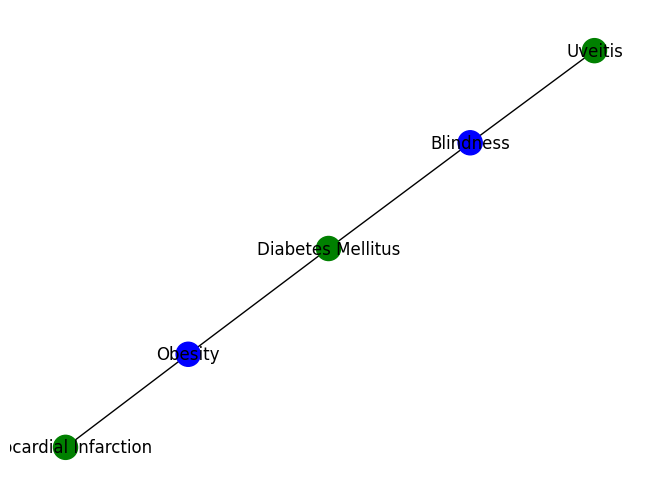

In [16]:
color_map = []
for node in symptom_disease_graph.nodes:
    if symptom_disease_graph.nodes[node]['type'] == 'symptom':
        color_map.append('blue')
    else: 
        color_map.append('green')      
nx.draw(symptom_disease_graph, node_color=color_map, with_labels=True)

In [20]:
nx.write_pajek(symptom_disease_graph, "symptom-disease-edges_simple-case.net")